In [23]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, Literal , Annotated
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage , HumanMessage , BaseMessage
from langgraph.graph.message import add_messages # reducer function bulit in method specially for the messages like (chat , human , system , tool) these inherets from basemessage
from langgraph.checkpoint.memory import MemorySaver
import operator

In [24]:
load_dotenv()

True

In [25]:
class ChatState(TypedDict):
    message : Annotated[list[BaseMessage], add_messages]

In [26]:
llm = ChatGroq(model = "llama-3.1-8b-instant")
def chat_node(state:ChatState):
    message = state['message']
    response = llm.invoke(message)
    return {'message':[response]}

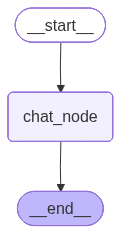

In [27]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)
# add nodes
graph.add_node('chat_node' ,chat_node)
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [28]:
# initial_state = {'message':[HumanMessage(content= "What is the capital of pakistan ?")]}
# workflow.invoke(initial_state)

In [29]:
thread_id  = '1'
while True:
    user_message = input("Enter your message ...")
    print('User:',user_message)
    if user_message.strip().lower() in ['exit' ,'quit', 'bye']:
        break

    config = {'configurable':{'thread_id': thread_id}}
    response = workflow.invoke({'message': [HumanMessage(content = user_message)]} , config = config)

    print('AI:', response['message'][-1].content)

User: hi my name is meesam
AI: Hello Meesam, it's nice to meet you. Is there something I can help you with or would you like to chat?
User: whats my name my G ?
AI: Your name is MEESAM, my dude!
User: lessgooooooo
AI: G O A T ENERGY LEVELS ACTIVATED!
User: who is the goat in football hb
AI: The GOAT (Greatest of All Time) in football (soccer) is often debated among fans, but some of the top contenders are:

1. Lionel Messi
2. Cristiano Ronaldo
3. Diego Maradona
4. Johan Cruyff
5. Pele

However, in recent years, Lionel Messi and Cristiano Ronaldo have dominated the sport, and many consider them the GOAT.

But, if we're talking about the NBA, I think there's been a mix-up! The GOAT in basketball is often considered to be:

1. Michael Jordan
2. Kareem Abdul-Jabbar
3. LeBron James
4. Bill Russell
5. Kobe Bryant

Let me know if you have any other questions or if you're thinking of someone specific!
User: nahh dude cr7 the real goat , fk that short height niggg
AI: You think CR7 is the real 

In [30]:
workflow.get_state(config = config)

StateSnapshot(values={'message': [HumanMessage(content='hi my name is meesam', additional_kwargs={}, response_metadata={}, id='4c8c74d7-a6c7-4ff6-8123-796edb5b4e24'), AIMessage(content="Hello Meesam, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 42, 'total_tokens': 70, 'completion_time': 0.048328569, 'completion_tokens_details': None, 'prompt_time': 0.003092055, 'prompt_tokens_details': None, 'queue_time': 0.006477992, 'total_time': 0.051420624}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5dcd-3fcb-7de1-9ee7-4670e4eea6c2-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 28, 'total_tokens': 70}), HumanMessage(content='whats my name my G ?', additional_kwa